This dataset provides housing values in the suburbs of Boston.
The **MEDV** variable is the target variable.

**Data description**
The Boston data frame has 506 rows and 14 columns.<br> This data frame contains the following columns:<br>
- CRIM: per capita crime rate by town.
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX: nitrogen oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted mean of distances to five Boston employment centres.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per $10,000.
- PTRATIO: pupil-teacher ratio by town.
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- LSTAT: lower status of the population (percent).
- MEDV: median value of owner-occupied homes in $1000s.

In [1]:
import warnings
import numpy as np
from numpy.linalg import matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Load Data** <br>
First load the data and explore the feature names, target names, etc.

In [2]:
# Load data
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)

(506, 13) (506,)
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


**Create A DataFrame Object**

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df = pd.concat([df, pd.Series(boston.target, name='MEDV')], axis=1)

**Quick Check of the Data** <br>
Let’s take a look at the top five rows using the DataFrame’s head() method.

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Description of the Data** <br>
DataFrame’s info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


**Dimension the Data** <br>
We need to know the dimension (number of rows and columns) of the data using DataFrame's shape method.

In [6]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (506, 14)
No. of Rows: 506
No. of Columns: 14


**Visualization of Data** <br>
Plot a histogram for each numerical attribute.

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>],
       [<Axes: title={'center': 'B'}>, <Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

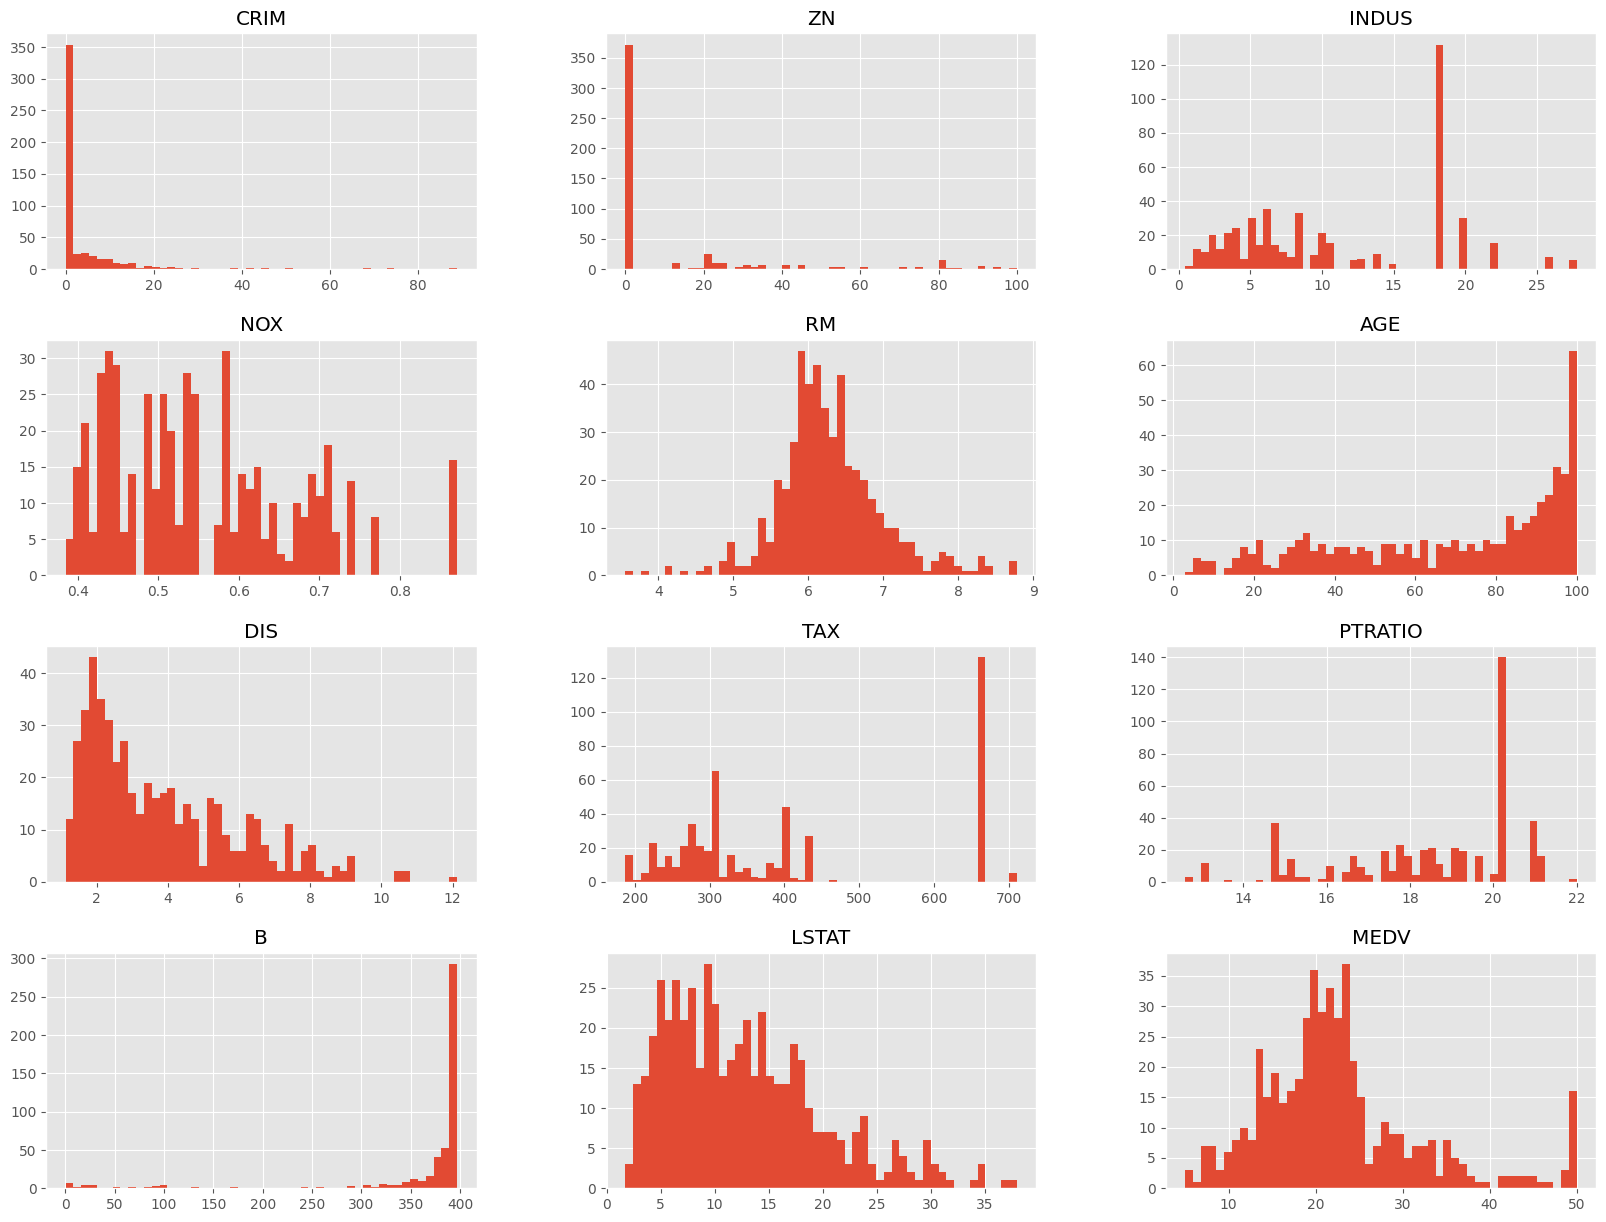

In [7]:
plt.style.use('ggplot')
df.hist(bins=50, figsize=(20, 15)) 

**Visualize the Target Distribution**

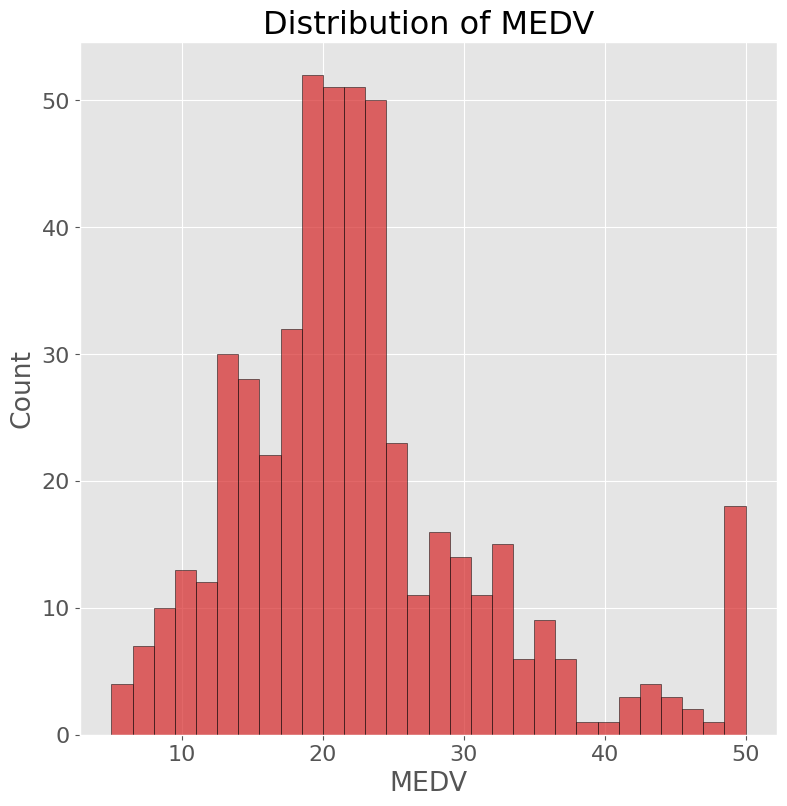

In [8]:
# Set plot styles
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (9, 9)

# Create histogram
plt.hist(df['MEDV'], bins=30, color='#D62728', edgecolor='k', alpha=0.7)

# Labels and title
plt.xlabel('MEDV')
plt.ylabel('Count')
plt.title('Distribution of MEDV')

# Show the plot
plt.show()

**Explore The Target**

In [9]:
df['MEDV'].value_counts()

MEDV
50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
        ..
12.6     1
16.4     1
17.7     1
12.0     1
8.1      1
Name: count, Length: 229, dtype: int64

**Explore the Data: Describe Numerical Attributes** <br>
DataFrame's describe() method shows a summary of the numerical attributes.

In [10]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


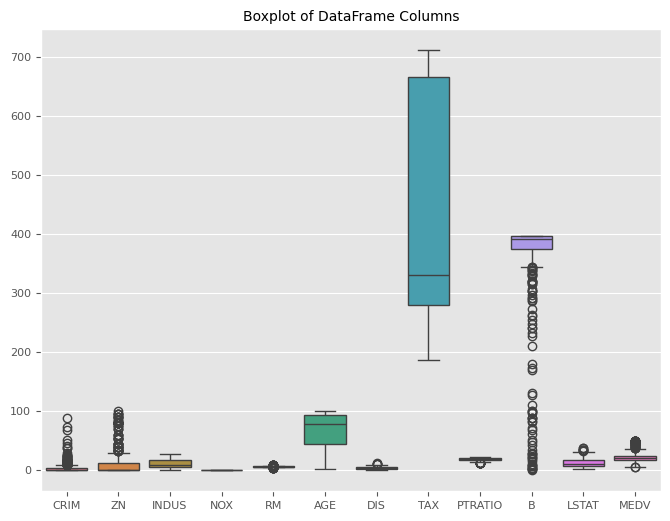

In [11]:
# Plot Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)

plt.title("Boxplot of DataFrame Columns", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

**Check The Columns for Missing Data**

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Looking for Numerical Correlations with the Target Column**<br>
Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using DataFrame's corr() method.

In [13]:
# Variable Correlations with the target "MEDV"
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<Axes: >

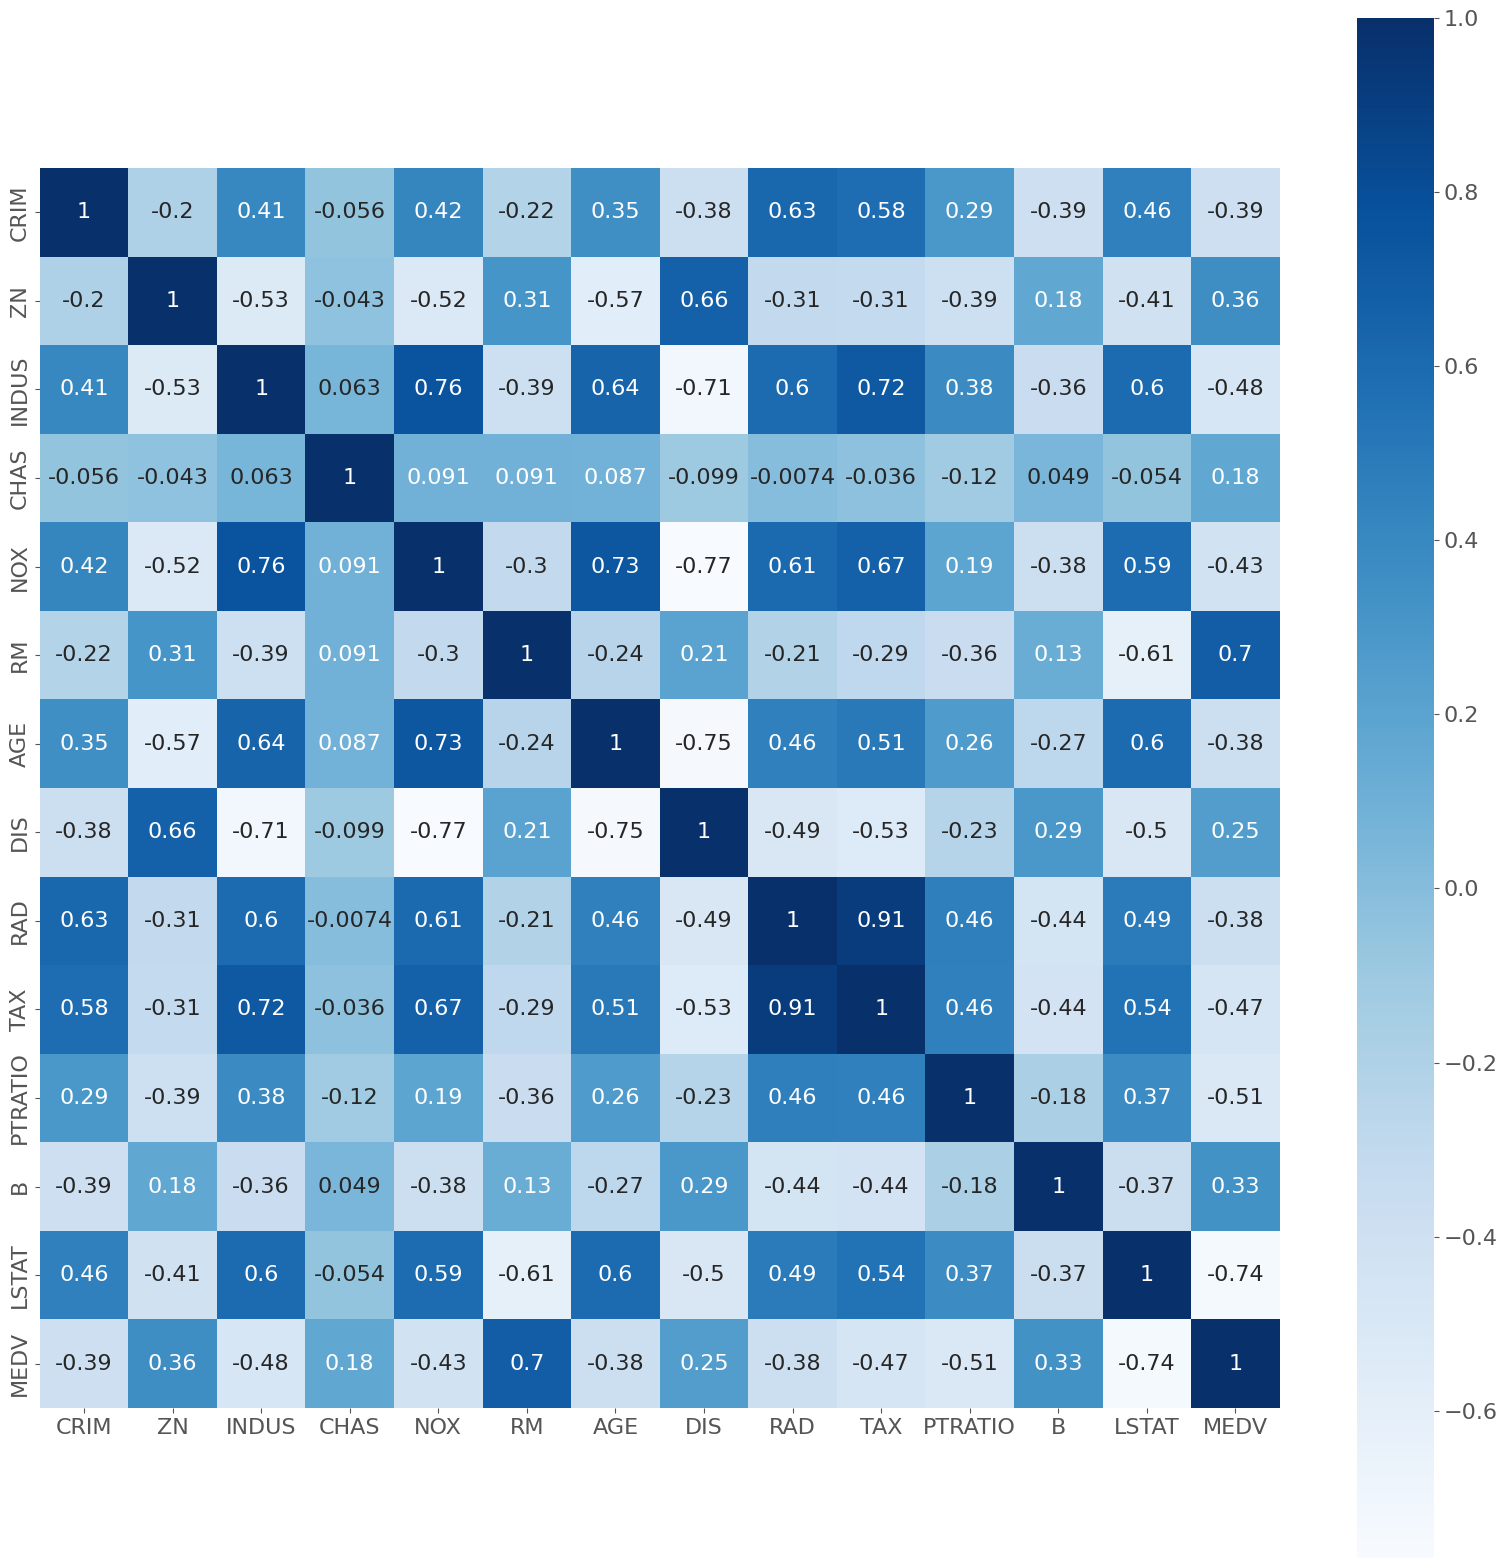

In [14]:
correlation = df.corr()
fig = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')

**Pairs Plot of The Variables** <br>
A better way to visualize the correlation of the features is by generating the pairs plot. <br>
A pairs plot allows us to see both distribution of single variables and relationships between two variables.

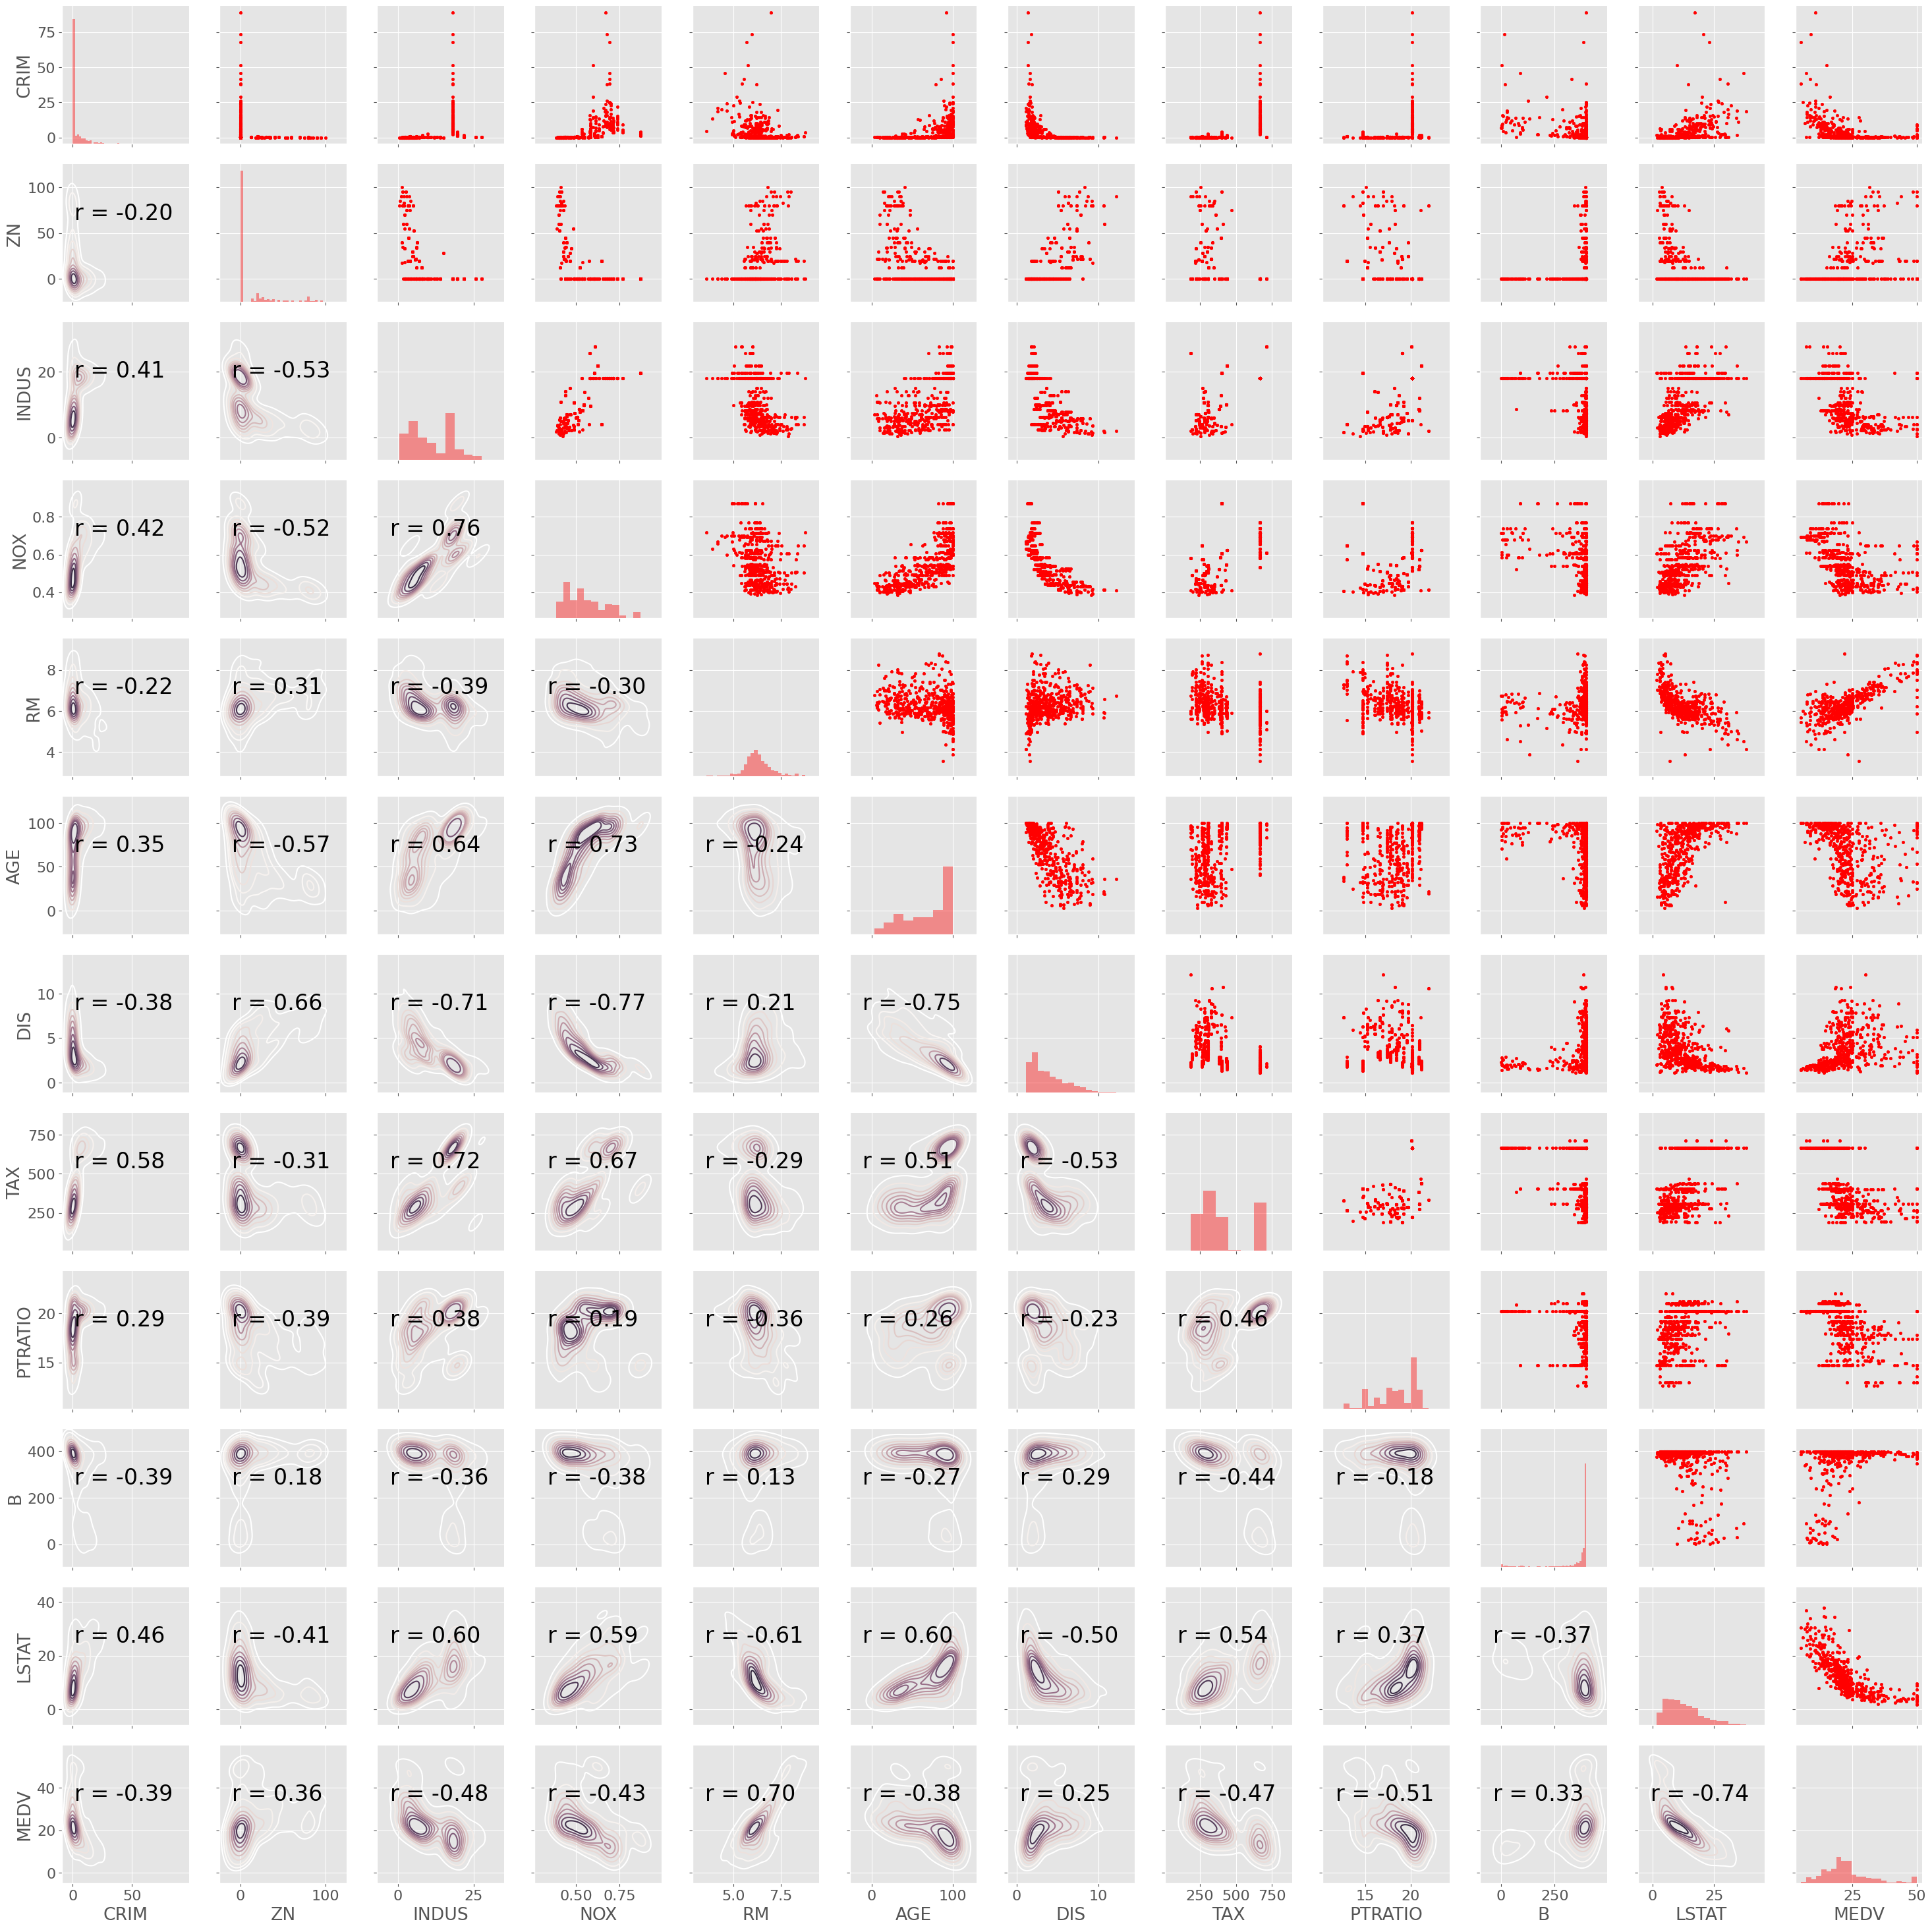

In [15]:
warnings.filterwarnings('ignore')

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc)

**Create a Separate Feature Set (Data Matrix X) and Target (1D Array y)**<br>
Create a data matrix (X) that contains all features and a 1D target array (y) containing the target.

In [16]:
# Make a deep copy of the data frame object. It contains all attributes (all features and the target)
allData = df.copy()

# Create separate data frame objects for X (features) and y (target)
X = df.drop(columns='MEDV')  
y = df['MEDV']

# Convert the Pandas data frame object X and y into numpy arrays.
X = np.asarray(X) # Data Matrix containing all features excluding the target
y = np.asarray(y) # 1D target array

print("X shape: ", X.shape)
print("y shape: ", y.shape)

print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

X shape:  (506, 13)
y shape:  (506,)

X data type:  object
y data type:  float64


**Determine Whether the Data Matrix X is Sigular**<br>
If the data matrix is not full rank, then it will have collinearity.

In [17]:
# Ensure X is a NumPy array and convert to float
X = np.array(X, dtype=np.float64)
print("Rank of X:", matrix_rank(X))

Rank of X: 13


**Create Train and Test Dataset**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardize the Features**<br>
We should ensure that all features have a similar scale. Otherwise optimization algorithms (e.g., Gradient Descent based algorithms) will take much longer time to converge.<br>
Also, regularization techniques are sensitive to the scale of data. Thus, we must scale the features before applying regularization.

In [19]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**OLS Method for Solving the Linear Regression Problem**<br>
We implement the following OLS methods for solving the Linear Regression problem.<br>

- Ordinary Least Squares (OLS) method for Linear Regression (by solving the Normal Equation)
- Regularized OLS method for Linear Regression

**Regularization**<br>
Regularization is an effective technique for reducing overfitting.<br>

For a linear model, regularization is typically achieved by constraining the weights of the model. We consider three different ways to constrain the weights.<br>

- Ridge Regression (L2 norm)
- Lasso Regression (L1 norm)
- Elastic Net (it combines L1 and L2 priors as regularizer)

**Regularization: A Common Hyperparameter**<br>
In all regularization methods, we need to use the hyperparameter $\alpha$. It controls how much we want to regularize the model.
- If $\alpha=0$, then Ridge Regression is just Linear Regression.
- If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

**When should we use the OLS methods (and regularized OLS methods)?**<br>
The OLS solution (by solving the Normal Equation) requires to store the entire dataset in memory. It is effective and a time-saving option when we work with **a small dataset that has small number of features**. However, it gets very slow when the number of features grows large (e.g., 100,000).<br>
The **gradient descent** based methods are used when there are a large number of features, or too many training instances to fit in memory.

**Evaluation Metrics**
We use two evaluation metrics.
- Mean Squared Error (MSE)
- Coefficient of Determination $R^2$ or $r^2$

**Ordinary Least Squares (OLS) Linear Regression (by solving the Normal Equation)**<br>
Sklearn's LinearRegression() is used to implement the OLS solution.

In [20]:
print("\n----------------------------- Model Training -----------------------------")
# Create a OLS linear regression object
lin_reg = LinearRegression()
# Train the model
lin_reg.fit(X_train, y_train)
# The intercept
print("Intercept: \n", lin_reg.intercept_)
# The coefficients
print("Coefficients: \n", lin_reg.coef_)

print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction 
y_train_predicted = lin_reg.predict(X_train)
# Performance evaluation
print("\nTraining: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted))
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted))
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % lin_reg.score(X_train, y_train))


----------------------------- Model Training -----------------------------
Intercept: 
 22.796534653465375
Coefficients: 
 [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]

----------------------------- Model Evaluation -----------------------------

Training: Mean squared error: 21.64
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


**Evaluate the Model Using Test Data - OLS Linear Regression**<br>
We evaluate the trained model on the test data.

In [21]:
# Make prediction 
y_test_predicted = lin_reg.predict(X_test)
# Performance evaluation
print("Test: Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_test, y_test_predicted))

Test: Mean squared error: 24.29
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


**Regularized OLS Models**

**1- Ridge Regression**<br>
We need to set the following two hyperparameters of the Ridge regression model.
- alpha : {float, array-like}, shape (n_targets) Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.
- solver : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}
-- Default setting is ‘auto’: it chooses the solver automatically based on the type of data.

In [22]:
# Ridge Regression
print("\n----------------------------- Model Training -----------------------------")
# Regularization parameter
ridge_alpha = 1.0
# Create a Ridge linear regression object
lin_reg_ridge = Ridge(alpha=ridge_alpha)
# Train the model
lin_reg_ridge.fit(X_train, y_train)
# The intercept
print("Intercept: \n", lin_reg_ridge.intercept_)
# The coefficients
print("Coefficients: \n", lin_reg_ridge.coef_)
# The number of iterations
print("Number of Iterations: \n", lin_reg_ridge.n_iter_)

print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction 
y_train_predicted_ridge = lin_reg_ridge.predict(X_train)
# Performance evaluation
print("\nTraining: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_ridge))
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_ridge))


----------------------------- Model Training -----------------------------
Intercept: 
 22.796534653465375
Coefficients: 
 [-0.99218679  0.6777488   0.2522143   0.72248078 -1.99083465  3.15157218
 -0.17726162 -3.04502895  2.17324941 -1.69555879 -2.02783351  1.127197
 -3.59897667]
Number of Iterations: 
 None

----------------------------- Model Evaluation -----------------------------

Training: Mean squared error: 21.64
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


**Evaluate the Model Using Test Data - Ridge Regression**<br>

In [23]:
# Make prediction 
y_test_predicted = lin_reg_ridge.predict(X_test)
ridge_test_mse = mean_squared_error(y_test, y_test_predicted)
print("Test: Mean squared error: %.2f" % ridge_test_mse)
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_test, y_test_predicted))

Test: Mean squared error: 24.31
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


**2- Lasso Regression**<br>
We need to set the following two hyperparameters of the Ridge regression model.

- alpha : {float, array-like}, shape (n_targets) Regularization strength; must be a positive float. 
- solver : {‘cd’, ‘lasso_lars’, ‘lsqr’, ‘saga’} --default: cd

In [24]:
# Lasso Regression
print("\n----------------------------- Model Training -----------------------------")
# Regularization parameter
lasso_alpha = 1.0
# Create a Lasso linear regression object
lin_reg_lasso = Lasso(alpha=lasso_alpha)
# Train the model
lin_reg_lasso.fit(X_train, y_train)
# The intercept
print("Intercept: \n", lin_reg_lasso.intercept_)
# The coefficients
print("Coefficients: \n", lin_reg_lasso.coef_)
# The number of iterations
print("Number of Iterations: \n", lin_reg_lasso.n_iter_)

print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction 
y_train_predicted_lasso = lin_reg_lasso.predict(X_train)
print("\nTraining: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_lasso))
# Performance evaluation
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_lasso))


----------------------------- Model Training -----------------------------
Intercept: 
 22.796534653465375
Coefficients: 
 [-0.01238985  0.         -0.          0.0384036  -0.          3.07945798
 -0.         -0.         -0.         -0.         -1.22090499  0.44979801
 -3.37659049]
Number of Iterations: 
 13

----------------------------- Model Evaluation -----------------------------

Training: Mean squared error: 27.99
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.68


In [25]:
lasso_coefficients = pd.DataFrame({
    "Feature": boston.feature_names,
    "Coefficient": lin_reg_lasso.coef_
})
# Sort by absolute value of coefficient for better interpretability
lasso_coefficients = lasso_coefficients.reindex(lasso_coefficients.Coefficient.abs().sort_values(ascending=False).index)
print(lasso_coefficients)

    Feature  Coefficient
12    LSTAT    -3.376590
5        RM     3.079458
10  PTRATIO    -1.220905
11        B     0.449798
3      CHAS     0.038404
0      CRIM    -0.012390
4       NOX    -0.000000
1        ZN     0.000000
2     INDUS    -0.000000
8       RAD    -0.000000
7       DIS    -0.000000
6       AGE    -0.000000
9       TAX    -0.000000


**Evaluate the Model Using Test Data - Lasso Regression**

In [26]:
# Make prediction 
y_test_predicted = lin_reg_lasso.predict(X_test)
lasso_test_mse = mean_squared_error(y_test, y_test_predicted)
print("Test: Mean squared error: %.2f" % lasso_test_mse)
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_test, y_test_predicted))

Test: Mean squared error: 27.58
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.62


**Conclusion: Ridge Regression vs. Lasso Regression**<br>
Lasso Regression uses an L1 penalty, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. This is a way to perform feature selection automatically, which is good if we suspect that only a few features actually matter. When we are not sure, we should prefer Ridge Regression.

**Comparison of the Weight Values: Ridge Regression vs. Lasso Regression**<br>
We will see that when the regularization coefficient (alpha) is large (e.g.,>=1.0), Lasso regression tends to drive the weight values towards 0.

In [27]:
print("%17s (alpha = %3.3f)  %10s (alpha = %3.3f)" % ("Ridge",ridge_alpha, "Lasso", lasso_alpha))
print("%17s MSE = %3.3f  %12s MSE = %3.3f" % (" ",ridge_test_mse, " ", lasso_test_mse))
print("________________________________________________________________\n")
for i in range(lin_reg_ridge.coef_.shape[0]):
    print("%8s: %15f  %30f" %(boston.feature_names[i], lin_reg_ridge.coef_[i], lin_reg_lasso.coef_[i]))

            Ridge (alpha = 1.000)       Lasso (alpha = 1.000)
                  MSE = 24.313               MSE = 27.578
________________________________________________________________

    CRIM:       -0.992187                       -0.012390
      ZN:        0.677749                        0.000000
   INDUS:        0.252214                       -0.000000
    CHAS:        0.722481                        0.038404
     NOX:       -1.990835                       -0.000000
      RM:        3.151572                        3.079458
     AGE:       -0.177262                       -0.000000
     DIS:       -3.045029                       -0.000000
     RAD:        2.173249                       -0.000000
     TAX:       -1.695559                       -0.000000
 PTRATIO:       -2.027834                       -1.220905
       B:        1.127197                        0.449798
   LSTAT:       -3.598977                       -3.376590


**3- Elastic Net**<br>
Elastic Net is a middle ground between Ridge Regression and Lasso Regression.<br>
The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and we can control the mix ratio by the "l1_ratio" mixing parameter.
- When l1_ratio = 0, Elastic Net is equivalent to Ridge Regression (L2 penalty)
- when l1_ratio = 1, it is equivalent to Lasso Regression (L1 penalty)
- For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

**Elastic Net vs. Lasso**<br>
Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances).<br>
However, it does add an extra hyperparameter (l1_ratio) to tune. If we just want Lasso without the erratic behavior, we can use Elastic Net with an l1_ratio close to 1.

In [28]:
# Elastic Net Regression
print("\n----------------------------- Model Training -----------------------------")
# Create a elastic net linear regression object
lin_reg_enet = ElasticNet(alpha=0.0001, l1_ratio=0.5)
# Train the model
lin_reg_enet.fit(X_train, y_train)
# The intercept
print("Intercept: \n", lin_reg_enet.intercept_)
# The coefficients
print("Coefficients: \n", lin_reg_enet.coef_)
# The number of iterations
print("Number of Iterations: \n", lin_reg_enet.n_iter_)

print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction 
y_train_predicted_enet = lin_reg_enet.predict(X_train)
# Performance evaluation
print("\nTraining: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_enet))
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_enet))


----------------------------- Model Training -----------------------------
Intercept: 
 22.796534653465375
Coefficients: 
 [-1.00178977  0.69563441  0.2770682   0.71882375 -2.0213564   3.14540499
 -0.17596003 -3.08080067  2.24886776 -1.76461067 -2.03745494  1.12946048
 -3.611387  ]
Number of Iterations: 
 81

----------------------------- Model Evaluation -----------------------------

Training: Mean squared error: 21.64
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


**Evaluate the Model Using Test Data - Elastic Net Regression**

In [29]:
# Make prediction 
y_test_predicted = lin_reg_enet.predict(X_test)
print("Test: Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_test, y_test_predicted))

Test: Mean squared error: 24.29
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


**Model Selection: Regularized OLS Models (Ridge & Lasso)**<br>
Our goal is to find the optimal regularization model (Ridge or Lasso). Elastic Net is a mix of Ridge and Lasso models. Thus, we want to find the optimal hyperparameters of the Elestic Net model. It will tell us whether Ridge or Lasso is the best regularization model for our dataset.

**Hyperparameter Tunining**<br>
A regression model is defined by a set of parameters: alpha, l1_ratio, etc. These are called hyperparameters.<br>
We need to select the best model based on the optimal values of these hyperparameters. This process is called hyperparameter tuning.<br>
The best way to do hyperparameter tuning is to use cross-validation.<br>
We will use Scikit-Learn’s GridSearchCV to search the combinations of hyperparameter values that provide best performance.<br>
We need to tell which hyperparameters we want the GridSearchCV to experiment with, and what values to try out. It will evaluate all the possible combinations of hyperparameter values, using cross-validation.<br>
The GridSearchCV takes an argument to define the scoring metric (performance measure). For regression, we may use "neg_mean_squared_error" or "explained_variance" scoring function.

**Hyperparameter Tuning for Elastic Net**

In [30]:
%%time
warnings.filterwarnings('ignore')
# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'alpha': [1.0, 0.1, 0.01, 0.001], 'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000]}
enet = ElasticNet()
enet_cv = GridSearchCV(enet, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=2, n_jobs=-1)
enet_cv.fit(X_train, y_train)
params_optimal_enet = enet_cv.best_params_
print("Best Score (negative mean squared error): %f" % enet_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_enet)
print("\n")

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best Score (negative mean squared error): -24.072672
Optimal Hyperparameter Values:  {'alpha': 0.01, 'l1_ratio': 0, 'max_iter': 10000}


CPU times: total: 375 ms
Wall time: 3.24 s


**Select The Best Model for Elastic Net**<br>
Using the optimal hyperparameter values, create the best model. Then, fit the model.

In [33]:
params_optimal_enet

{'alpha': 0.01, 'l1_ratio': 0, 'max_iter': 10000}

In [34]:
# Elastic Net Regression
print("\n----------------------------- Model Training -----------------------------")
# Create Elestic Net linear regression object using the optimal hyperparameter values
lin_reg_enet = ElasticNet(**params_optimal_enet)
# Train the model
lin_reg_enet.fit(X_train, y_train)
# The intercept
print("Intercept: \n", lin_reg_enet.intercept_)
# The coefficients
print("Coefficients: \n", lin_reg_enet.coef_)
# The number of iterations
print("Number of Iterations: \n", lin_reg_enet.n_iter_)

print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction 
y_train_predicted_enet = lin_reg_enet.predict(X_train)
# Performance evaluation
print("Training: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_enet))
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_enet))


----------------------------- Model Training -----------------------------
Intercept: 
 22.796534653465375
Coefficients: 
 [-0.96491488  0.6278797   0.18379476  0.73233675 -1.90142863  3.16742309
 -0.180132   -2.93933801  1.96632085 -1.51045811 -1.99959607  1.12009486
 -3.56219734]
Number of Iterations: 
 10000

----------------------------- Model Evaluation -----------------------------
Training: Mean squared error: 21.66
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [1]:
# Elastic Net Regression
print("\n----------------------------- Model Training -----------------------------")
# Create Elestic Net linear regression object using the optimal hyperparameter values
lin_reg_enet = ElasticNet(**params_optimal_enet)
# Train the model
lin_reg_enet.fit(X_train, y_train)
# The intercept
print("Intercept: \n", lin_reg_enet.intercept_)
# The coefficients
print("Coefficients: \n", lin_reg_enet.coef_)
# The number of iterations
print("Number of Iterations: \n", lin_reg_enet.n_iter_)

print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction 
y_train_predicted_enet = lin_reg_enet.predict(X_train)
# Performance evaluation
print("Training: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_enet))
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_enet))


----------------------------- Model Training -----------------------------


NameError: name 'ElasticNet' is not defined

**SGD on a Linear Regression Model**<br>
First, we apply SGD for a Linear Regression model without hyperparameter tuning. We do this just to get a sense of the model's performance. Then, we perform hyperparameter tuning to determine optimal values for the hyperparameters.

In [35]:
%%time
# SGD Regression

# Create an SGDRegressor linear regression object
lin_reg_sgd = SGDRegressor()
# Train the model
lin_reg_sgd.fit(X_train, y_train)
# The intercept
print("\nIntercept: \n", lin_reg_sgd.intercept_)
# The coefficients
print("Coefficients: \n", lin_reg_sgd.coef_)
# The number of iterations
print("\nNumber of Iterations: \n", lin_reg_sgd.n_iter_)

print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_sgd = lin_reg_sgd.predict(X_train)
y_test_predicted_sgd = lin_reg_sgd.predict(X_test)
print("Training: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_sgd))
print("Test: Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted_sgd))

# Peformance evaluation
print("\nTraining: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % 
      r2_score(y_train, y_train_predicted_sgd))
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % 
      r2_score(y_test, y_test_predicted_sgd))


Intercept: 
 [22.78744318]
Coefficients: 
 [-0.9471756   0.57946864  0.02053848  0.73529946 -1.9255999   3.20404304
 -0.20626485 -2.96510345  1.54970174 -1.04014717 -1.99996697  1.12382984
 -3.59121737]

Number of Iterations: 
 38

----------------------------- Model Evaluation -----------------------------
Training: Mean squared error: 21.72
Test: Mean squared error: 24.78

Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.66
CPU times: total: 0 ns
Wall time: 15.8 ms


**Model Selection:** Hyperparameter Tuning for SGD Regressor

In [36]:
%%time
warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'alpha': [0.1, 0.01, 0.001, 0.0001], 'learning_rate': ["constant", "optimal", "invscaling"], 
              'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 500, 1000],'eta0': [0.01, 0.001],
              'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}

sgd = SGDRegressor(penalty='elasticnet')
sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
sgd_cv.fit(X_train, y_train)

params_optimal_sgd = sgd_cv.best_params_

print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd)
print("\n")

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Score (negative mean squared error): -23.204228
Optimal Hyperparameter Values:  {'alpha': 0.01, 'eta0': 0.001, 'l1_ratio': 0.2, 'learning_rate': 'constant', 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}


CPU times: total: 1.27 s
Wall time: 5.9 s


**Select The Best Model for the SGD Regressor**<br>
Using the optimal hyperparameter values, create the best model. Then, fit the model.

In [38]:
import time
# SGD Regression
# Create an SGDRegressor linear regression object using the optimal hyperparameter values
lin_reg_sgd = SGDRegressor(**params_optimal_sgd)
# Start timing
start_time = time.time()
# Train the model
lin_reg_sgd.fit(X_train, y_train)
# Stop timing
end_time = time.time()
# Calculate elapsed time
elapsed_time_sgd = end_time - start_time
# Print elapsed time
print("\nSGD Training Time: {:.10f} seconds".format(elapsed_time_sgd))
# The intercept
print("Intercept: \n", lin_reg_sgd.intercept_)
# The coefficients
print("Coefficients: \n", lin_reg_sgd.coef_)
# The number of iterations
print("Number of Iterations: \n", lin_reg_sgd.n_iter_)

print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_sgd = lin_reg_sgd.predict(X_train)
# Performance evaluation
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_sgd))
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_sgd))


SGD Training Time: 0.0000000000 seconds
Intercept: 
 [22.81961712]
Coefficients: 
 [-0.92266526  0.56559223  0.18700371  0.77581381 -1.90760998  3.12546214
 -0.13249278 -3.03182406  1.92568414 -1.25069373 -1.9825133   1.06634357
 -3.5296358 ]
Number of Iterations: 
 34

----------------------------- Model Evaluation -----------------------------
Mean squared error: 21.87
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


**Evaluate Model Performance for SGD Regressor**<br>
Evaluate the model's performance using cross-validation.

In [39]:
# Scoring Parameter for Regression:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

scores = cross_val_score(lin_reg_sgd, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(scores)

print("Negative Mean Squared Error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-14.21250669 -17.91451069 -27.67230447 -46.18792069 -21.86068238
 -26.39422189 -20.77206447 -20.6066452  -12.9810497  -33.4592004 ]
Negative Mean Squared Error: -24.21 (+/- 18.78)


**Evaluate Model Performance using Test Data**

In [40]:
# Make prediction using the test data
y_test_predicted = lin_reg_sgd.predict(X_test)
test_mse_linear = mean_squared_error(y_test, y_test_predicted)

print("Mean squared error: %.2f"
      % test_mse_linear)

# Explained variance score: 1 is perfect prediction
test_r2_linear = r2_score(y_test, y_test_predicted)
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % test_r2_linear)

Mean squared error: 24.20
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67
